# 데이터 전처리

In [23]:
import pandas as pd
import warnings

# openpyxl 모듈의 특정 경고 무시
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

# 주어진 경로에서 데이터를 읽고 표시하는 함수
def read_and_display_excel(path, header=1):
    df = pd.read_excel(path, header=header)
    return df

# 파일 경로 목록
all_files = [
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\2008-2010_시군구_경제활동인구_총괄.xlsx',
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\2010-2012_시군구_경제활동인구_총괄.xlsx',
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\2013-2024_시군구_경제활동인구_총괄.xlsx'
]

# 각 파일에 대해 데이터를 읽고 표시
dfs = [read_and_display_excel(file) for file in all_files]
# Shape of dataframe 0: (3, 15)
# Shape of dataframe 1: (9, 15)
# Shape of dataframe 2: (23, 15)

# 성남시와 고양시의 특정 열 추출
df_seongnam = dfs[0].iloc[:, :8]
df_goyang = dfs[0].iloc[:, 8:]
df_goyang.insert(0, '시점', dfs[0]['시점'])

# 고양시와 성남시 데이터 분할 및 병합
for df in dfs[1:]:
    df_seongnam_temp = df.iloc[:, :8]
    df_goyang_temp = df.iloc[:, 8:]
    df_goyang_temp.insert(0, '시점', df['시점'])
    
    df_seongnam = pd.concat([df_seongnam, df_seongnam_temp], ignore_index=True)
    df_goyang = pd.concat([df_goyang, df_goyang_temp], ignore_index=True)

# 시점 컬럼에서 연도만 추출하여 새로운 컬럼 추가
df_seongnam['연도'] = df_seongnam['시점'].apply(lambda x: str(x).split('.')[0])
df_goyang['연도'] = df_goyang['시점'].apply(lambda x: str(x).split('.')[0])

# 연도를 기준으로 데이터 합치기 (숫자형 데이터만 합산)
df_seongnam_grouped = df_seongnam.groupby('연도').agg({col: 'sum' for col in df_seongnam.columns if df_seongnam[col].dtype in ['int64', 'float64']}).reset_index()
df_goyang_grouped = df_goyang.groupby('연도').agg({col: 'sum' for col in df_goyang.columns if df_goyang[col].dtype in ['int64', 'float64']}).reset_index()

# '행정구역별' 컬럼 추가
df_seongnam_grouped.insert(0, '행정구역별', '성남시')
df_goyang_grouped.insert(0, '행정구역별', '고양시')

# '총 인구수(천명)' 컬럼 추가
df_seongnam_grouped.insert(2, '성남시 총인구수(천명)', 0)
df_goyang_grouped.insert(2, '고양시 총인구수(천명)', 0)
df_seongnam_grouped.insert(3, '분당신도시 총인구수(천명)', 0)
df_goyang_grouped.insert(3, '일산신도시 총인구수(천명)', 0)

# 결과 확인
# display(df_seongnam.head())
# display(df_seongnam.shape)

display(df_seongnam_grouped.head())
display(df_seongnam_grouped.shape)

# display(df_goyang)
# display(df_goyang.shape)

display(df_goyang_grouped.head())
display(df_goyang_grouped.shape)


,행정구역별,연도,성남시 총인구수(천명),분당신도시 총인구수(천명),15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),고용률 (%),실업률 (％)
0,성남시,2008,0,0,760.6,448.1,434.5,13.6,312.5,57.1,3.0
1,성남시,2009,0,0,774.2,452.0,440.6,11.4,322.1,56.9,2.5
2,성남시,2010,0,0,1579.7,885.7,860.6,25.1,694.1,108.9,5.7
3,성남시,2011,0,0,3180.5,1862.3,1807.1,55.3,1318.1,227.3,11.9
4,성남시,2012,0,0,3193.3,1943.3,1873.5,69.8,1250.0,234.7,14.5


(17, 11)

,행정구역별,연도,고양시 총인구수(천명),일산신도시 총인구수(천명),15세이상인구 (천명).1,경제활동인구 (천명).1,취업자 (천명).1,실업자 (천명).1,비경제활동인구 (천명).1,고용률 (%).1,실업률 (％).1
0,고양시,2008,0,0,714.9,419.0,409.3,9.7,295.9,57.2,2.3
1,고양시,2009,0,0,726.0,412.1,401.0,11.1,314.0,55.2,2.7
2,고양시,2010,0,0,1471.6,810.7,788.5,22.1,661.0,107.1,5.5
3,고양시,2011,0,0,2987.1,1743.1,1705.1,38.2,1244.1,228.3,8.7
4,고양시,2012,0,0,3035.8,1759.7,1708.0,51.7,1276.1,225.0,11.8


(17, 11)

In [ ]:
# 파일 경로 목록
population_files = [
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\200801_201212_고양시_주민등록인구및세대현황_월간.xlsx', # (17, 362)
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\201301_201712_고양시_주민등록인구및세대현황_월간.xlsx', # (17, 362)
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\201801_202212_고양시_주민등록인구및세대현황_월간.xlsx', # (21, 362)
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\202301_202410_고양시_주민등록인구및세대현황_월간.xlsx', # (19, 134)
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\200801_201212_성남시_주민등록인구및세대현황_월간.xlsx', # (19, 362)
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\201301_201712_성남시_주민등록인구및세대현황_월간.xlsx', # (18, 362)
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\201801_202212_성남시_주민등록인구및세대현황_월간.xlsx', # (18, 362)
    r'C:\Users\twoimo\Documents\GitHub\NewTownInsight\일자리\고용실업률\202301_202410_성남시_주민등록인구및세대현황_월간.xlsx' # (18, 134)
]

# Shape of population dataframe 0: (43, 362)
# Shape of population dataframe 1: (43, 362)
# Shape of population dataframe 2: (53, 362)
# Shape of population dataframe 3: (48, 134)
# Shape of population dataframe 4: (55, 362)
# Shape of population dataframe 5: (54, 362)
# Shape of population dataframe 6: (54, 362)
# Shape of population dataframe 7: (54, 134)

# 모든 파일을 읽어서 데이터프레임 리스트로 저장
population_dfs = [pd.read_excel(file, header=2) for file in population_files]

# 모든 데이터프레임을 병합
merged_population_df = pd.concat(population_dfs, ignore_index=True)

display(merged_population_df.head())
display(merged_population_df.shape)

target_areas = [
    '경기도 성남시 분당구 야탑동',
    '경기도 성남시 분당구 이매동',
    '경기도 성남시 분당구 서현동',
    '경기도 성남시 분당구 분당동',
    '경기도 성남시 분당구 수내동',
    '경기도 성남시 분당구 정자동',
    '경기도 성남시 분당구 금곡동',
    '경기도 성남시 분당구 구미동',
    '경기도 고양시 일산동구 식사동',
    '경기도 고양시 일산동구 중산동',
    '경기도 고양시 일산동구 정발산동',
    '경기도 고양시 일산동구 풍산동',
    '경기도 고양시 일산동구 백석동',
    '경기도 고양시 일산동구 마두동',
    '경기도 고양시 일산동구 장항동',
    '경기도 고양시 일산서구 일산동',
    '경기도 고양시 일산서구 주엽동',
    '경기도 고양시 일산서구 대화동',
    '경기도 고양시 일산서구 탄현동',
    '경기도 성남시 분당구 야탑1동',
    '경기도 성남시 분당구 야탑2동',
    '경기도 성남시 분당구 야탑3동',
    '경기도 성남시 분당구 이매1동',
    '경기도 성남시 분당구 이매2동',
    '경기도 성남시 분당구 서현1동',
    '경기도 성남시 분당구 서현2동',
    '경기도 성남시 분당구 분당1동',
    '경기도 성남시 분당구 분당2동',
    '경기도 성남시 분당구 수내1동',
    '경기도 성남시 분당구 수내2동',
    '경기도 성남시 분당구 수내3동',
    '경기도 성남시 분당구 정자1동',
    '경기도 성남시 분당구 정자2동',
    '경기도 성남시 분당구 정자3동',
    # '경기도 성남시 분당구 금곡1동',
    # '경기도 성남시 분당구 금곡2동',
    '경기도 성남시 분당구 구미1동',
    '경기도 성남시 분당구 구미2동',
    '경기도 고양시 일산동구 식사1동',
    '경기도 고양시 일산동구 식사2동',
    '경기도 고양시 일산동구 중산1동',
    '경기도 고양시 일산동구 중산2동',
    '경기도 고양시 일산동구 정발산1동',
    '경기도 고양시 일산동구 정발산2동',
    '경기도 고양시 일산동구 풍산1동',
    '경기도 고양시 일산동구 풍산2동',
    '경기도 고양시 일산동구 백석1동',
    '경기도 고양시 일산동구 백석2동',
    '경기도 고양시 일산동구 마두1동',
    '경기도 고양시 일산동구 마두2동',
    '경기도 고양시 일산동구 장항1동',
    '경기도 고양시 일산동구 장항2동',
    '경기도 고양시 일산서구 일산1동',
    '경기도 고양시 일산서구 일산2동',
    '경기도 고양시 일산서구 일산3동',
    '경기도 고양시 일산서구 주엽1동',
    '경기도 고양시 일산서구 주엽2동',
    '경기도 고양시 일산서구 대화1동',
    '경기도 고양시 일산서구 대화2동',
    '경기도 고양시 일산서구 탄현1동',
    '경기도 고양시 일산서구 탄현2동'
]

# 행정기관 컬럼에서 경기도 고양시, 경기도 성남시만 필터링
merged_population_df['행정기관'] = merged_population_df['행정기관'].str.strip()
filtered_population_df = merged_population_df[merged_population_df['행정기관'].isin(target_areas)]

display(filtered_population_df.head())
display(filtered_population_df.shape)


,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,총인구수.1,세대수.1,...,세대당 인구.58,남자 인구수.58,여자 인구수.58,남여 비율.58,총인구수.59,세대수.59,세대당 인구.59,남자 인구수.59,여자 인구수.59,남여 비율.59
0,4128000000,경기도 고양시,"926,283","346,729",2.67,"457,818","468,465",0.98,"927,732","347,533",...,2.65,"477,287","490,506",0.97,"969,916","365,492",2.65,"478,333","491,583",0.97
1,4128100000,경기도 고양시 덕양구,"378,114","146,782",2.58,"189,184","188,930",1.00,"378,149","146,918",...,2.56,"197,043","197,783",1.00,"396,559","154,549",2.57,"197,895","198,664",1.00
2,4128151000,경기도 고양시 덕양구 주교동,"20,847","8,460",2.46,"10,437","10,410",1.00,"20,861","8,494",...,2.41,"9,959","9,779",1.02,"19,688","8,153",2.41,"9,945","9,743",1.02
3,4128152000,경기도 고양시 덕양구 원신동,"2,246","1,054",2.13,"1,226","1,020",1.20,"2,239","1,044",...,2.55,"1,841","1,662",1.11,"3,634","1,417",2.56,"1,902","1,732",1.10
4,4128153000,경기도 고양시 덕양구 흥도동,"4,123","1,935",2.13,"2,237","1,886",1.19,"4,122","1,919",...,2.05,"1,714","1,426",1.20,"3,741","1,744",2.15,"2,012","1,729",1.16


(404, 362)

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,총인구수.1,세대수.1,...,세대당 인구.58,남자 인구수.58,여자 인구수.58,남여 비율.58,총인구수.59,세대수.59,세대당 인구.59,남자 인구수.59,여자 인구수.59,남여 비율.59
26,4128555100,경기도 고양시 일산동구 백석1동,"29,347","11,019",2.66,"14,252","15,095",0.94,"29,376","11,052",...,2.59,"13,672","14,523",0.94,"28,196","10,888",2.59,"13,670","14,526",0.94
27,4128555200,경기도 고양시 일산동구 백석2동,"21,901","9,920",2.21,"10,645","11,256",0.95,"22,002","9,962",...,2.10,"10,746","11,635",0.92,"22,419","10,683",2.10,"10,766","11,653",0.92
28,4128556000,경기도 고양시 일산동구 마두1동,"29,171","9,578",3.05,"14,223","14,948",0.95,"29,128","9,589",...,2.99,"13,537","14,247",0.95,"27,781","9,278",2.99,"13,531","14,250",0.95
29,4128557000,경기도 고양시 일산동구 마두2동,"18,707","6,186",3.02,"9,054","9,653",0.94,"18,758","6,200",...,3.03,"8,686","9,431",0.92,"18,113","5,963",3.04,"8,686","9,427",0.92
30,4128558000,경기도 고양시 일산동구 장항1동,"3,319","1,506",2.20,"1,822","1,497",1.22,"3,292","1,501",...,2.02,"1,762","1,360",1.30,"3,099","1,535",2.02,"1,755","1,344",1.31


(110, 362)

In [25]:

# 고양시, 성남시 총인구 필터링
all_goyang_population = merged_population_df[merged_population_df['행정기관'].str.contains('고양시')]
all_seongnam_population = merged_population_df[merged_population_df['행정기관'].str.contains('성남시')]

# 고양시(일산신도시) 총인구수 컬럼만 필터링
all_filtered_population_goyang = all_goyang_population.filter(regex='총인구수')

# 17개 행을 모두 더해서 1행으로 만들기 (200801_201212)
all_goyang_row_1 = all_filtered_population_goyang.iloc[:17].replace(',', '', regex=True).astype(float).sum()

# 17행을 모두 더해서 2행으로 만들기 (201301_201712)
all_goyang_row_2 = all_filtered_population_goyang.iloc[17:34].replace(',', '', regex=True).astype(float).sum()

# 21행을 모두 더해서 3행으로 만들기 (201801_202212)
all_goyang_row_3 = all_filtered_population_goyang.iloc[34:55].replace(',', '', regex=True).astype(float).sum()

# 19행을 모두 더해서 4행으로 만들기 (202301_202410)
all_goyang_row_4 = all_filtered_population_goyang.iloc[55:74].replace(',', '', regex=True).astype(float).sum()

# 새로운 데이터프레임 생성
all_goyang_population_df = pd.DataFrame([all_goyang_row_1, all_goyang_row_2, all_goyang_row_3, all_goyang_row_4])

display(all_goyang_population_df)
display(all_goyang_population_df.shape)

# 성남시(분당신도시) 총인구수 컬럼만 필터링
all_filtered_population_seongnam = all_seongnam_population.filter(regex='총인구수')

# 17개 행을 모두 더해서 1행으로 만들기 (200801_201212)
all_seongnam_row_1 = all_filtered_population_seongnam.iloc[:17].replace(',', '', regex=True).astype(float).sum()

# 17행을 모두 더해서 2행으로 만들기 (201301_201712)
all_seongnam_row_2 = all_filtered_population_seongnam.iloc[17:34].replace(',', '', regex=True).astype(float).sum()

# 21행을 모두 더해서 3행으로 만들기 (201801_202212)
all_seongnam_row_3 = all_filtered_population_seongnam.iloc[34:55].replace(',', '', regex=True).astype(float).sum()

# 19행을 모두 더해서 4행으로 만들기 (202301_202410)
all_seongnam_row_4 = all_filtered_population_seongnam.iloc[55:74].replace(',', '', regex=True).astype(float).sum()

# 새로운 데이터프레임 생성
all_seongnam_population_df = pd.DataFrame([all_seongnam_row_1, all_seongnam_row_2, all_seongnam_row_3, all_seongnam_row_4])

display(all_seongnam_population_df)
display(all_seongnam_population_df.shape)

# 일산신도시, 분당신도시 인구 필터링
goyang_population = filtered_population_df[filtered_population_df['행정기관'].str.contains('고양시')]
seongnam_population = filtered_population_df[filtered_population_df['행정기관'].str.contains('성남시')]

# 고양시(일산신도시) 총인구수 컬럼만 필터링
filtered_population_goyang = goyang_population.filter(regex='총인구수')

# 17개 행을 모두 더해서 1행으로 만들기 (200801_201212)
goyang_row_1 = filtered_population_goyang.iloc[:17].replace(',', '', regex=True).astype(float).sum()

# 17행을 모두 더해서 2행으로 만들기 (201301_201712)
goyang_row_2 = filtered_population_goyang.iloc[17:34].replace(',', '', regex=True).astype(float).sum()

# 21행을 모두 더해서 3행으로 만들기 (201801_202212)
goyang_row_3 = filtered_population_goyang.iloc[34:55].replace(',', '', regex=True).astype(float).sum()

# 19행을 모두 더해서 4행으로 만들기 (202301_202410)
goyang_row_4 = filtered_population_goyang.iloc[55:74].replace(',', '', regex=True).infer_objects(copy=False).astype(float).sum()

# 새로운 데이터프레임 생성
goyang_population_df = pd.DataFrame([goyang_row_1, goyang_row_2, goyang_row_3, goyang_row_4])

# 성남시(분당신도시) 총인구수 컬럼만 필터링
filtered_population_seongnam = seongnam_population.filter(regex='총인구수')

# 19개 행을 모두 더해서 1행으로 만들기 (200801_201212)
seongnam_row_1 = filtered_population_seongnam.iloc[:19].replace(',', '', regex=True).astype(float).sum()

# 18행을 모두 더해서 2행으로 만들기 (201301_201712)
seongnam_row_2 = filtered_population_seongnam.iloc[19:37].replace(',', '', regex=True).astype(float).sum()

# 18행을 모두 더해서 3행으로 만들기 (201801_202212)
seongnam_row_3 = filtered_population_seongnam.iloc[37:55].replace(',', '', regex=True).astype(float).sum()

# 18행을 모두 더해서 4행으로 만들기 (202301_202410)
seongnam_row_4 = filtered_population_seongnam.iloc[55:73].replace(',', '', regex=True).infer_objects(copy=False).astype(float).sum()

# 새로운 데이터프레임 생성
seongnam_population_df = pd.DataFrame([seongnam_row_1, seongnam_row_2, seongnam_row_3, seongnam_row_4])

# 결과 확인
display(goyang_population_df)
display(goyang_population_df.shape)

display(seongnam_population_df)
display(seongnam_population_df.shape)

,총인구수,총인구수.1,총인구수.2,총인구수.3,총인구수.4,총인구수.5,총인구수.6,총인구수.7,총인구수.8,총인구수.9,...,총인구수.50,총인구수.51,총인구수.52,총인구수.53,총인구수.54,총인구수.55,총인구수.56,총인구수.57,총인구수.58,총인구수.59
0,1589458.0,1590894.0,1591883.0,1594155.0,1596263.0,1596456.0,1596439.0,1599091.0,1602800.0,1606792.0,...,1641294.0,1641542.0,1641979.0,1642601.0,1643634.0,1645542.0,1647987.0,1651961.0,1657204.0,1662839.0
1,899180.0,901735.0,902816.0,904614.0,906346.0,906950.0,907293.0,909647.0,912166.0,913453.0,...,950519.0,950727.0,951362.0,951900.0,952775.0,953346.0,953509.0,953615.0,954778.0,955501.0
2,1808292.0,1812412.0,1814177.0,1816410.0,1817994.0,1822786.0,1828661.0,1831662.0,1834525.0,1837148.0,...,1989026.0,1989441.0,1990220.0,1992334.0,1993708.0,1994377.0,1995011.0,1996297.0,1997950.0,1998445.0
3,771901.0,772159.0,772075.0,772204.0,772709.0,771753.0,770904.0,771156.0,771834.0,772370.0,...,775542.0,775312.0,775303.0,774978.0,774571.0,773774.0,772881.0,772288.0,771928.0,771390.0


(4, 60)

,총인구수,총인구수.1,총인구수.2,총인구수.3,총인구수.4,총인구수.5,총인구수.6,총인구수.7,총인구수.8,총인구수.9,...,총인구수.50,총인구수.51,총인구수.52,총인구수.53,총인구수.54,총인구수.55,총인구수.56,총인구수.57,총인구수.58,총인구수.59
0,1463713.0,1460896.0,1455093.0,1451439.0,1448951.0,1446908.0,1445887.0,1444287.0,1442513.0,1439342.0,...,1444740.0,1443703.0,1442710.0,1441892.0,1441106.0,1440145.0,1440120.0,1441769.0,1442226.0,1443323.0
1,1012605.0,1014157.0,1015139.0,1016360.0,1016282.0,1015011.0,1015077.0,1013936.0,1013280.0,1011765.0,...,1049217.0,1049007.0,1048840.0,1048199.0,1048261.0,1048666.0,1048015.0,1046458.0,1046426.0,1048878.0
2,384500.0,384370.0,383494.0,383050.0,382937.0,382711.0,382880.0,382423.0,382072.0,381133.0,...,442431.0,442664.0,442735.0,442748.0,442962.0,442918.0,442892.0,443007.0,443254.0,443644.0
3,1447021.0,1447290.0,1446613.0,1445448.0,1445185.0,1444291.0,1443328.0,1441970.0,1440465.0,1438596.0,...,1445619.0,1446107.0,1445965.0,1444995.0,1445417.0,1447943.0,1446898.0,1443655.0,1441574.0,1441374.0


(4, 60)

C:\Users\twoimo\AppData\Local\Temp\ipykernel_30644\1170662392.py:82: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  seongnam_row_4 = filtered_population_seongnam.iloc[55:73].replace(',', '', regex=True).infer_objects(copy=False).astype(float).sum()


,총인구수,총인구수.1,총인구수.2,총인구수.3,총인구수.4,총인구수.5,총인구수.6,총인구수.7,총인구수.8,총인구수.9,...,총인구수.50,총인구수.51,총인구수.52,총인구수.53,총인구수.54,총인구수.55,총인구수.56,총인구수.57,총인구수.58,총인구수.59
0,417916.0,418204.0,417897.0,418152.0,418209.0,418031.0,417685.0,417821.0,417818.0,417782.0,...,413097.0,413210.0,413037.0,412887.0,413058.0,412827.0,412425.0,412048.0,411930.0,411711.0
1,373869.0,373351.0,372789.0,372295.0,371779.0,370952.0,370415.0,369980.0,369943.0,369758.0,...,437652.0,436929.0,436194.0,435731.0,435025.0,434072.0,432786.0,432070.0,431430.0,430969.0
2,416268.0,415752.0,414963.0,414500.0,414203.0,413977.0,413533.0,413082.0,412731.0,412330.0,...,75966.0,75817.0,75723.0,75586.0,75502.0,75297.0,74985.0,74804.0,74711.0,74578.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(4, 60)

,총인구수,총인구수.1,총인구수.2,총인구수.3,총인구수.4,총인구수.5,총인구수.6,총인구수.7,총인구수.8,총인구수.9,...,총인구수.50,총인구수.51,총인구수.52,총인구수.53,총인구수.54,총인구수.55,총인구수.56,총인구수.57,총인구수.58,총인구수.59
0,409905.0,409867.0,408943.0,408409.0,408151.0,407997.0,408200.0,407713.0,376955.0,376148.0,...,361084.0,360841.0,360663.0,360434.0,360514.0,360388.0,360315.0,360158.0,360009.0,360061.0
1,412412.0,412357.0,411775.0,411071.0,411059.0,410954.0,410835.0,410564.0,410194.0,409447.0,...,381792.0,381708.0,381905.0,381821.0,381703.0,381371.0,380540.0,380083.0,379718.0,379568.0
2,355050.0,354788.0,354400.0,353959.0,353801.0,353838.0,353590.0,353158.0,352887.0,352753.0,...,135119.0,134872.0,134667.0,134601.0,134483.0,134403.0,134045.0,133815.0,133711.0,133416.0
3,60189.0,60071.0,59969.0,59859.0,59799.0,59777.0,59751.0,59591.0,59544.0,59479.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(4, 60)

In [26]:
# 데이터 프레임을 1차원으로 변경
all_goyang_population_flat = all_goyang_population_df.values.flatten() # (240,)
all_seongnam_population_flat = all_seongnam_population_df.values.flatten() # (240,)
goyang_population_flat = goyang_population_df.values.flatten() # (240,)
seongnam_population_flat = seongnam_population_df.values.flatten() # (240,)

# 데이터 분할
years = list(range(2008, 2028))
goyang_population_split = [goyang_population_flat[i:i + 12] for i in range(0, len(goyang_population_flat), 12)]
seongnam_population_split = [seongnam_population_flat[i:i + 12] for i in range(0, len(seongnam_population_flat), 12)]
all_goyang_population_split = [all_goyang_population_flat[i:i + 12] for i in range(0, len(all_goyang_population_flat), 12)]
all_seongnam_population_split = [all_seongnam_population_flat[i:i + 12] for i in range(0, len(all_seongnam_population_flat), 12)]

# 데이터 프레임 생성
goyang_population_df = pd.DataFrame(goyang_population_split, index=years[:len(goyang_population_split)], columns=[f'{i+1}월' for i in range(12)])
seongnam_population_df = pd.DataFrame(seongnam_population_split, index=years[:len(seongnam_population_split)], columns=[f'{i+1}월' for i in range(12)])
all_goyang_population_df = pd.DataFrame(all_goyang_population_split, index=years[:len(all_goyang_population_split)], columns=[f'{i+1}월' for i in range(12)])
all_seongnam_population_df = pd.DataFrame(all_seongnam_population_split, index=years[:len(all_seongnam_population_split)], columns=[f'{i+1}월' for i in range(12)])

# 인덱스를 컬럼으로 변환
goyang_population_df.reset_index(inplace=True)
seongnam_population_df.reset_index(inplace=True)
all_goyang_population_df.reset_index(inplace=True)
all_seongnam_population_df.reset_index(inplace=True)

# 컬럼명 변경
goyang_population_df.rename(columns={'index': '연도'}, inplace=True)
seongnam_population_df.rename(columns={'index': '연도'}, inplace=True)
all_goyang_population_df.rename(columns={'index': '연도'}, inplace=True)
all_seongnam_population_df.rename(columns={'index': '연도'}, inplace=True)

# 고양시, 성남시 총인구 연도별 데이터 확인
print("경기도 고양시 총인구수")
all_goyang_population_df = all_goyang_population_df[:17]
display(all_goyang_population_df.head(17))
display(all_goyang_population_df.shape)

print("경기도 성남시 총인구수")
all_seongnam_population_df = all_seongnam_population_df[:17]
display(all_seongnam_population_df.head(17))
display(all_seongnam_population_df.shape)

print("경기도 일산신도시 총인구수")
goyang_population_df = goyang_population_df[:17]
display(goyang_population_df.head(17))
display(goyang_population_df.shape)

print("경기도 분당신도시 총인구수")
seongnam_population_df = seongnam_population_df[:17]
display(seongnam_population_df.head(17))
display(seongnam_population_df.shape)

경기도 고양시 총인구수


,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2008,1589458.0,1590894.0,1591883.0,1594155.0,1596263.0,1596456.0,1596439.0,1599091.0,1602800.0,1606792.0,1609117.0,1610425.0
1,2009,1611175.0,1611283.0,1611135.0,1612031.0,1612405.0,1612542.0,1611945.0,1611030.0,1611265.0,1610022.0,1611928.0,1615576.0
2,2010,1618405.0,1622069.0,1623988.0,1626522.0,1627350.0,1627216.0,1626390.0,1623700.0,1622109.0,1634619.0,1635696.0,1636605.0
3,2011,1636838.0,1638082.0,1639319.0,1640276.0,1641374.0,1642814.0,1643355.0,1643083.0,1642940.0,1643483.0,1644460.0,1643460.0
4,2012,1643341.0,1642353.0,1641294.0,1641542.0,1641979.0,1642601.0,1643634.0,1645542.0,1647987.0,1651961.0,1657204.0,1662839.0
5,2013,899180.0,901735.0,902816.0,904614.0,906346.0,906950.0,907293.0,909647.0,912166.0,913453.0,914781.0,915412.0
6,2014,915691.0,916173.0,915218.0,915027.0,914861.0,914916.0,914782.0,914716.0,914662.0,914199.0,914374.0,912712.0
7,2015,912420.0,912353.0,911709.0,911409.0,910797.0,911355.0,911401.0,911145.0,911625.0,919774.0,923587.0,927292.0
8,2016,929349.0,933479.0,935494.0,937389.0,938849.0,940646.0,942049.0,943981.0,945067.0,947147.0,949233.0,948945.0
9,2017,949618.0,950685.0,950519.0,950727.0,951362.0,951900.0,952775.0,953346.0,953509.0,953615.0,954778.0,955501.0


(17, 13)

경기도 성남시 총인구수


,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2008,1463713.0,1460896.0,1455093.0,1451439.0,1448951.0,1446908.0,1445887.0,1444287.0,1442513.0,1439342.0,1437410.0,1436194.0
1,2009,1435071.0,1435678.0,1433748.0,1434741.0,1435080.0,1435948.0,1437029.0,1438195.0,1439137.0,1439826.0,1441823.0,1443955.0
2,2010,1447156.0,1450275.0,1450568.0,1450520.0,1449524.0,1448511.0,1447922.0,1447321.0,1446308.0,1460573.0,1459518.0,1459097.0
3,2011,1460006.0,1460084.0,1458821.0,1457283.0,1455539.0,1453835.0,1452727.0,1451308.0,1451006.0,1450046.0,1449299.0,1448243.0
4,2012,1447723.0,1446242.0,1444740.0,1443703.0,1442710.0,1441892.0,1441106.0,1440145.0,1440120.0,1441769.0,1442226.0,1443323.0
5,2013,1012605.0,1014157.0,1015139.0,1016360.0,1016282.0,1015011.0,1015077.0,1013936.0,1013280.0,1011765.0,1010897.0,1010688.0
6,2014,1010348.0,1011200.0,1011246.0,1013373.0,1014924.0,1016260.0,1017667.0,1021447.0,1023817.0,1025267.0,1027905.0,1030718.0
7,2015,1034636.0,1037885.0,1038983.0,1039327.0,1037544.0,1036830.0,1037183.0,1037054.0,1036774.0,1046081.0,1045790.0,1047714.0
8,2016,1049088.0,1050271.0,1049937.0,1049596.0,1049403.0,1049125.0,1048799.0,1048883.0,1048339.0,1048014.0,1048538.0,1048347.0
9,2017,1048988.0,1049548.0,1049217.0,1049007.0,1048840.0,1048199.0,1048261.0,1048666.0,1048015.0,1046458.0,1046426.0,1048878.0


(17, 13)

경기도 일산신도시 총인구수


,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2008,417916.0,418204.0,417897.0,418152.0,418209.0,418031.0,417685.0,417821.0,417818.0,417782.0,418100.0,417799.0
1,2009,417634.0,417257.0,416705.0,416531.0,416459.0,416157.0,415896.0,415592.0,415402.0,415178.0,414805.0,413758.0
2,2010,413611.0,413280.0,412594.0,412052.0,411540.0,411318.0,410712.0,410082.0,409479.0,410639.0,410254.0,409911.0
3,2011,409658.0,409990.0,409715.0,409609.0,409292.0,409598.0,410203.0,411137.0,411745.0,412358.0,413061.0,413124.0
4,2012,413084.0,413303.0,413097.0,413210.0,413037.0,412887.0,413058.0,412827.0,412425.0,412048.0,411930.0,411711.0
5,2013,373869.0,373351.0,372789.0,372295.0,371779.0,370952.0,370415.0,369980.0,369943.0,369758.0,369184.0,368719.0
6,2014,368580.0,367962.0,367175.0,366674.0,365967.0,365646.0,365040.0,364473.0,365128.0,366477.0,367499.0,367916.0
7,2015,368285.0,368412.0,368485.0,368444.0,368404.0,368076.0,367814.0,367507.0,367027.0,366781.0,366604.0,366312.0
8,2016,366584.0,366250.0,365577.0,365273.0,365082.0,364741.0,364220.0,363760.0,363514.0,363095.0,362527.0,361952.0
9,2017,439551.0,438756.0,437652.0,436929.0,436194.0,435731.0,435025.0,434072.0,432786.0,432070.0,431430.0,430969.0


(17, 13)

경기도 분당신도시 총인구수


,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2008,409905.0,409867.0,408943.0,408409.0,408151.0,407997.0,408200.0,407713.0,376955.0,376148.0,375912.0,375555.0
1,2009,375558.0,375625.0,374265.0,373617.0,373356.0,372067.0,371443.0,370049.0,369421.0,368465.0,367551.0,367196.0
2,2010,366889.0,366776.0,366206.0,365926.0,365963.0,365815.0,365182.0,364542.0,364212.0,365411.0,365094.0,365107.0
3,2011,365237.0,365326.0,364768.0,364310.0,363646.0,363148.0,362700.0,361856.0,361607.0,361590.0,361712.0,361437.0
4,2012,361432.0,361387.0,361084.0,360841.0,360663.0,360434.0,360514.0,360388.0,360315.0,360158.0,360009.0,360061.0
5,2013,412412.0,412357.0,411775.0,411071.0,411059.0,410954.0,410835.0,410564.0,410194.0,409447.0,409007.0,409051.0
6,2014,409037.0,408840.0,408428.0,407859.0,407648.0,407390.0,406821.0,406378.0,405981.0,405575.0,405559.0,405956.0
7,2015,406393.0,406729.0,406432.0,406077.0,384154.0,384077.0,384289.0,384384.0,384285.0,384069.0,383930.0,383907.0
8,2016,384182.0,384001.0,383474.0,383270.0,383109.0,382641.0,382086.0,381704.0,381516.0,381587.0,381713.0,381985.0
9,2017,382075.0,382231.0,381792.0,381708.0,381905.0,381821.0,381703.0,381371.0,380540.0,380083.0,379718.0,379568.0


(17, 13)

In [27]:
# 연도별 총인구수를 구하는 함수
def calculate_total_population(df, months=12):
    df = df.replace(',', '', regex=True).astype(float)
    total_population = df.sum(axis=1) / months
    return total_population

# 고양시와 성남시의 연도별 총인구수 계산
goyang_total_population = calculate_total_population(goyang_population_df.iloc[:, 1:], months=12) / 1000
seongnam_total_population = calculate_total_population(seongnam_population_df.iloc[:, 1:], months=12) / 1000
all_goyang_total_population = calculate_total_population(all_goyang_population_df.iloc[:, 1:], months=12) / 1000
all_seongnam_total_population = calculate_total_population(all_seongnam_population_df.iloc[:, 1:], months=12) / 1000

# 2024년 데이터는 10개월로 나눔
goyang_total_population.iloc[-1] = calculate_total_population(pd.DataFrame(goyang_population_df.iloc[-1, 1:11]).T, months=10) / 1000
seongnam_total_population.iloc[-1] = calculate_total_population(pd.DataFrame(seongnam_population_df.iloc[-1, 1:11]).T, months=10) / 1000
all_goyang_total_population.iloc[-1] = calculate_total_population(pd.DataFrame(all_goyang_population_df.iloc[-1, 1:11]).T, months=10) / 1000
all_seongnam_total_population.iloc[-1] = calculate_total_population(pd.DataFrame(seongnam_population_df.iloc[-1, 1:11]).T, months=10) / 1000

# 연도별 총인구수 데이터 프레임 생성
total_population_df = pd.DataFrame({
    '연도': years[:len(goyang_total_population)],
    '성남시 총인구수(천명)': all_seongnam_total_population.astype(int),
    '분당신도시 총인구수(천명)': seongnam_total_population.astype(int),
    '고양시 총인구수(천명)': all_goyang_total_population.astype(int),
    '일산신도시 총인구수(천명)': goyang_total_population.astype(int),
})

# 결과 확인
display(total_population_df)

,연도,성남시 총인구수(천명),분당신도시 총인구수(천명),고양시 총인구수(천명),일산신도시 총인구수(천명)
0,2008,1447,397,1598,417
1,2009,1437,371,1611,415
2,2010,1451,365,1627,411
3,2011,1454,363,1641,410
4,2012,1442,360,1646,412
5,2013,1013,410,907,371
6,2014,1018,407,914,366
7,2015,1039,391,914,367
8,2016,1049,382,940,364
9,2017,1048,381,952,435


In [28]:
# '연도' 컬럼의 데이터 타입을 문자열로 변환
df_seongnam_grouped['연도'] = df_seongnam_grouped['연도'].astype(str)
df_goyang_grouped['연도'] = df_goyang_grouped['연도'].astype(str)
total_population_df['연도'] = total_population_df['연도'].astype(str)

# df_seongnam_grouped와 df_goyang_grouped의 '총 인구수' 컬럼 채우기
df_seongnam_grouped['성남시 총인구수(천명)'] = df_seongnam_grouped['연도'].map(total_population_df.set_index('연도')['성남시 총인구수(천명)'])
df_goyang_grouped['고양시 총인구수(천명)'] = df_goyang_grouped['연도'].map(total_population_df.set_index('연도')['고양시 총인구수(천명)'])
df_seongnam_grouped['분당신도시 총인구수(천명)'] = df_seongnam_grouped['연도'].map(total_population_df.set_index('연도')['분당신도시 총인구수(천명)'])
df_goyang_grouped['일산신도시 총인구수(천명)'] = df_goyang_grouped['연도'].map(total_population_df.set_index('연도')['일산신도시 총인구수(천명)'])

df_seongnam_grouped.drop(columns=['행정구역별'], inplace=True)
df_goyang_grouped.drop(columns=['행정구역별'], inplace=True)

df_seongnam_grouped.rename(columns={'고용률 (%)': '성남시 고용률 (%)'}, inplace=True)
df_goyang_grouped.rename(columns={'고용률 (%).1': '고양시 고용률 (%)'}, inplace=True)

df_seongnam_grouped.rename(columns={'실업률 (％)': '성남시 실업률 (%)'}, inplace=True)
df_goyang_grouped.rename(columns={'실업률 (％).1': '고양시 실업률 (%)'}, inplace=True)

df_seongnam_grouped.rename(columns={'경제활동인구 (천명)': '성남시 경제활동인구 (천명)'}, inplace=True)
df_goyang_grouped.rename(columns={'경제활동인구 (천명).1': '고양시 경제활동인구 (천명)'}, inplace=True)

df_seongnam_grouped.rename(columns={'15세이상인구 (천명)': '성남시 15세이상인구 (천명)'}, inplace=True)
df_goyang_grouped.rename(columns={'15세이상인구 (천명).1': '고양시 15세이상인구 (천명)'}, inplace=True)

df_seongnam_grouped.rename(columns={'취업자 (천명)': '성남시 취업자 (천명)'}, inplace=True)
df_goyang_grouped.rename(columns={'취업자 (천명).1': '고양시 취업자 (천명)'}, inplace=True)

df_seongnam_grouped.rename(columns={'실업자 (천명)': '성남시 실업자 (천명)'}, inplace=True)
df_goyang_grouped.rename(columns={'실업자 (천명).1': '고양시 실업자 (천명)'}, inplace=True)

df_seongnam_grouped.rename(columns={'비경제활동인구 (천명)': '성남시 비경제활동인구 (천명)'}, inplace=True)
df_goyang_grouped.rename(columns={'비경제활동인구 (천명).1': '고양시 비경제활동인구 (천명)'}, inplace=True)

In [29]:
# Assuming you have the following DataFrames:
# seongnam_econ_df: Contains '연도' and '성남시 경제활동인구 (천명)'
# bundang_pop_df: Contains '연도' and '분당신도시 총인구수 (천명)'
# seongnam_pop_df: Contains '연도' and '성남시 총인구수 (천명)'

# Calculate '분당신도시 경제활동인구 (천명)'
df_seongnam_grouped['분당신도시 경제활동인구 (천명)'] = (
    df_seongnam_grouped['성남시 경제활동인구 (천명)'] * df_seongnam_grouped['분당신도시 총인구수(천명)'] / df_seongnam_grouped['성남시 총인구수(천명)']).round(1)

# Display the result
# display(df_seongnam_grouped[['연도', '일산신도시 경제활동인구 (천명)']])

# Calculate '일산신도시 경제활동인구 (천명)'
df_goyang_grouped['일산신도시 경제활동인구 (천명)'] = (
    df_goyang_grouped['고양시 경제활동인구 (천명)'] * df_goyang_grouped['일산신도시 총인구수(천명)'] / df_goyang_grouped['고양시 총인구수(천명)']).round(1)

# Display the result
# display(df_goyang_grouped[['연도', '일산신도시 경제활동인구 (천명)']])

# Calculate '성남시 취업률 (%)' and add it to the DataFrame
df_seongnam_grouped['성남시 취업률 (%)'] = (
    df_seongnam_grouped['성남시 취업자 (천명)'] / df_seongnam_grouped['성남시 경제활동인구 (천명)'] * 100
).round(1)

# Calculate '고양시 취업률 (%)' and add it to the DataFrame
df_goyang_grouped['고양시 취업률 (%)'] = (
    df_goyang_grouped['고양시 취업자 (천명)'] / df_goyang_grouped['고양시 경제활동인구 (천명)'] * 100
).round(1)

# '분당신도시 취업자 (천명)' 계산 및 추가
df_seongnam_grouped['분당신도시 취업자 (천명)'] = (
    df_seongnam_grouped['분당신도시 경제활동인구 (천명)'] * df_seongnam_grouped['성남시 취업률 (%)'] / 100
).round(1)

# '분당신도시 취업자 (천명)' 계산 및 추가
df_goyang_grouped['일산신도시 취업자 (천명)'] = (
    df_goyang_grouped['일산신도시 경제활동인구 (천명)'] * df_goyang_grouped['고양시 취업률 (%)'] / 100
).round(1)

# '분당신도시 취업자 (천명)' 계산 및 추가
df_seongnam_grouped['분당신도시 실업자 (천명)'] = (
    df_seongnam_grouped['분당신도시 경제활동인구 (천명)'] * df_seongnam_grouped['성남시 실업률 (%)'] / 100
).round(1)

# '분당신도시 취업자 (천명)' 계산 및 추가
df_goyang_grouped['일산신도시 실업자 (천명)'] = (
    df_goyang_grouped['일산신도시 경제활동인구 (천명)'] * df_goyang_grouped['고양시 실업률 (%)'] / 100
).round(1)

# '분당신도시 취업률 (%)' 계산 및 추가
df_seongnam_grouped['분당신도시 취업률 (%)'] = (
    df_seongnam_grouped['분당신도시 취업자 (천명)'] / df_seongnam_grouped['분당신도시 경제활동인구 (천명)'] * 100
).round(1)

# '일산신도시 취업률 (%)' 계산 및 추가
df_goyang_grouped['일산신도시 취업률 (%)'] = (
    df_goyang_grouped['일산신도시 취업자 (천명)'] / df_goyang_grouped['일산신도시 경제활동인구 (천명)'] * 100
).round(1)

# '분당신도시 실업률 (%)' 계산 및 추가
df_seongnam_grouped['분당신도시 실업률 (%)'] = (
    df_seongnam_grouped['분당신도시 실업자 (천명)'] / df_seongnam_grouped['분당신도시 경제활동인구 (천명)'] * 100
).round(1)

# '일산신도시 실업률 (%)' 계산 및 추가
df_goyang_grouped['일산신도시 실업률 (%)'] = (
    df_goyang_grouped['일산신도시 실업자 (천명)'] / df_goyang_grouped['일산신도시 경제활동인구 (천명)'] * 100
).round(1)


In [30]:
# 성남시 결과 확인
display(df_seongnam_grouped.head(17))
display(df_seongnam_grouped.shape)

,연도,성남시 총인구수(천명),분당신도시 총인구수(천명),성남시 15세이상인구 (천명),성남시 경제활동인구 (천명),성남시 취업자 (천명),성남시 실업자 (천명),성남시 비경제활동인구 (천명),성남시 고용률 (%),성남시 실업률 (%),분당신도시 경제활동인구 (천명),성남시 취업률 (%),분당신도시 취업자 (천명),분당신도시 실업자 (천명),분당신도시 취업률 (%),분당신도시 실업률 (%)
0,2008,1447,397,760.6,448.1,434.5,13.6,312.5,57.1,3.0,122.9,97.0,119.2,3.7,97.0,3.0
1,2009,1437,371,774.2,452.0,440.6,11.4,322.1,56.9,2.5,116.7,97.5,113.8,2.9,97.5,2.5
2,2010,1451,365,1579.7,885.7,860.6,25.1,694.1,108.9,5.7,222.8,97.2,216.6,12.7,97.2,5.7
3,2011,1454,363,3180.5,1862.3,1807.1,55.3,1318.1,227.3,11.9,464.9,97.0,451.0,55.3,97.0,11.9
4,2012,1442,360,3193.3,1943.3,1873.5,69.8,1250.0,234.7,14.5,485.2,96.4,467.7,70.4,96.4,14.5
5,2013,1013,410,1610.0,984.0,946.0,39.0,625.0,117.5,7.8,398.3,96.1,382.8,31.1,96.1,7.8
6,2014,1018,407,1618.0,993.0,951.0,42.0,626.0,117.4,8.5,397.0,95.8,380.3,33.7,95.8,8.5
7,2015,1039,391,1620.0,997.0,958.0,38.0,624.0,118.3,7.6,375.2,96.1,360.6,28.5,96.1,7.6
8,2016,1049,382,1632.0,1011.0,977.0,34.0,621.0,119.8,6.7,368.2,96.6,355.7,24.7,96.6,6.7
9,2017,1048,381,1623.0,977.0,944.0,33.0,647.0,116.4,6.7,355.2,96.6,343.1,23.8,96.6,6.7


(17, 16)

In [31]:
# 고양시 결과확인
display(df_goyang_grouped.head(17))
display(df_goyang_grouped.shape)

,연도,고양시 총인구수(천명),일산신도시 총인구수(천명),고양시 15세이상인구 (천명),고양시 경제활동인구 (천명),고양시 취업자 (천명),고양시 실업자 (천명),고양시 비경제활동인구 (천명),고양시 고용률 (%),고양시 실업률 (%),일산신도시 경제활동인구 (천명),고양시 취업률 (%),일산신도시 취업자 (천명),일산신도시 실업자 (천명),일산신도시 취업률 (%),일산신도시 실업률 (%)
0,2008,1598,417,714.9,419.0,409.3,9.7,295.9,57.2,2.3,109.3,97.7,106.8,2.5,97.7,2.3
1,2009,1611,415,726.0,412.1,401.0,11.1,314.0,55.2,2.7,106.2,97.3,103.3,2.9,97.3,2.7
2,2010,1627,411,1471.6,810.7,788.5,22.1,661.0,107.1,5.5,204.8,97.3,199.3,11.3,97.3,5.5
3,2011,1641,410,2987.1,1743.1,1705.1,38.2,1244.1,228.3,8.7,435.5,97.8,425.9,37.9,97.8,8.7
4,2012,1646,412,3035.8,1759.7,1708.0,51.7,1276.1,225.0,11.8,440.5,97.1,427.7,52.0,97.1,11.8
5,2013,907,371,1555.0,907.0,891.0,15.0,648.0,114.7,3.4,371.0,98.2,364.3,12.6,98.2,3.4
6,2014,914,366,1605.0,936.0,916.0,20.0,670.0,114.1,4.2,374.8,97.9,366.9,15.7,97.9,4.2
7,2015,914,367,1647.0,952.0,928.0,24.0,695.0,112.7,5.1,382.3,97.5,372.7,19.5,97.5,5.1
8,2016,940,364,1676.0,986.0,955.0,31.0,690.0,113.9,6.4,381.8,96.9,370.0,24.4,96.9,6.4
9,2017,952,435,1700.0,982.0,944.0,38.0,718.0,111.1,7.7,448.7,96.1,431.2,34.5,96.1,7.7


(17, 16)

# 시각화

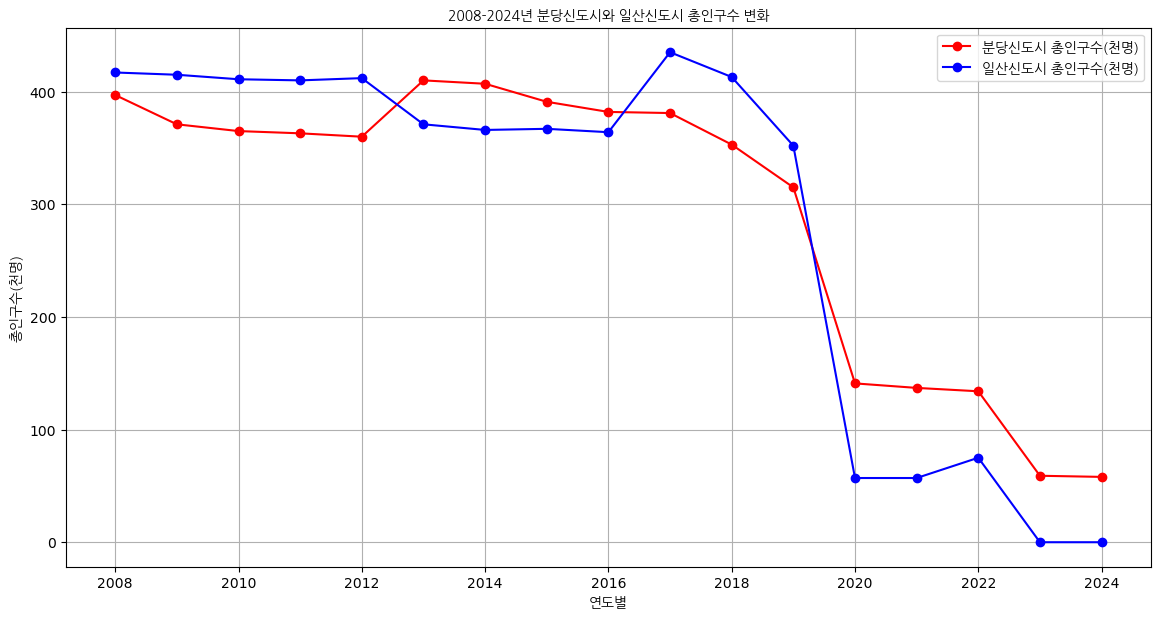

In [32]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

fontprop = FontProperties(fname='NanumGothic.ttf')

# 연도별 성남시와 고양시 총인구수 그래프
plt.figure(figsize=(14, 7))

# 성남시 총인구수 그래프
plt.plot(total_population_df['연도'], total_population_df['분당신도시 총인구수(천명)'], marker='o', label='분당신도시 총인구수(천명)', color='red')

# 고양시 총인구수 그래프
plt.plot(total_population_df['연도'], total_population_df['일산신도시 총인구수(천명)'], marker='o', label='일산신도시 총인구수(천명)', color='blue')

# 그래프 제목 및 축 레이블 설정
plt.title('2008-2024년 분당신도시와 일산신도시 총인구수 변화', fontproperties=fontprop)
plt.xlabel('연도별', fontproperties=fontprop)
plt.ylabel('총인구수(천명)', fontproperties=fontprop)

# x축 눈금 설정
plt.xticks(total_population_df['연도'][::2], rotation=0)

# 범례 설정
plt.legend(prop=fontprop, fontsize=24)

# 그리드 설정
plt.grid(True)

# 그래프 표시
plt.show()

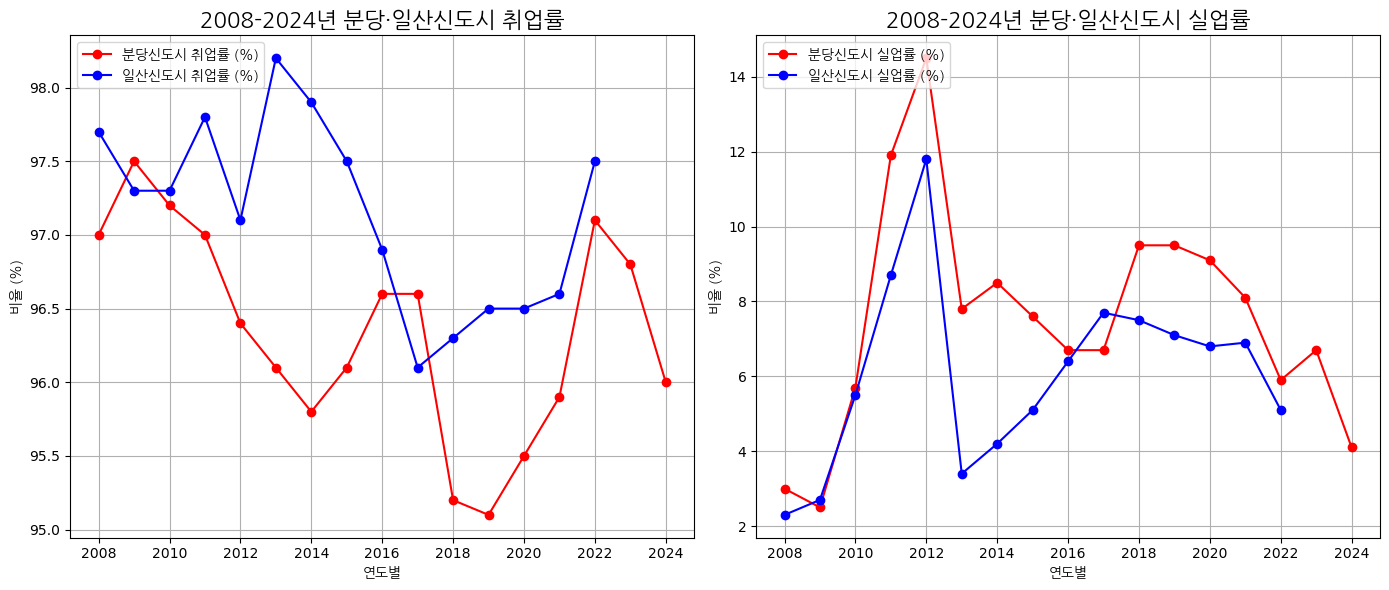

In [33]:
import matplotlib.pyplot as plt

# Assuming df_seongnam_grouped and df_goyang_grouped are already defined and contain the necessary columns

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define the x-ticks to show every 2 years
xticks = df_seongnam_grouped['연도'][::2]

# Plot 성남시와 고양시 취업률
axes[0].plot(df_seongnam_grouped['연도'], df_seongnam_grouped['분당신도시 취업률 (%)'], marker='o', label='분당신도시 취업률 (%)', color='red')
axes[0].plot(df_goyang_grouped['연도'], df_goyang_grouped['일산신도시 취업률 (%)'], marker='o', label='일산신도시 취업률 (%)', color='blue')
axes[0].set_title('2008-2024년 분당·일산신도시 취업률', fontproperties=fontprop, fontsize=16)
axes[0].set_xlabel('연도별', fontproperties=fontprop)
axes[0].set_ylabel('비율 (%)', fontproperties=fontprop)
axes[0].set_xticks(xticks)
axes[0].legend(prop=fontprop, fontsize=12, loc='upper left')
axes[0].grid(True)

# Plot 성남시와 고양시 실업률
axes[1].plot(df_seongnam_grouped['연도'], df_seongnam_grouped['분당신도시 실업률 (%)'], marker='o', label='분당신도시 실업률 (%)', color='red')
axes[1].plot(df_goyang_grouped['연도'], df_goyang_grouped['일산신도시 실업률 (%)'], marker='o', label='일산신도시 실업률 (%)', color='blue')
axes[1].set_title('2008-2024년 분당·일산신도시 실업률', fontproperties=fontprop, fontsize=16)
axes[1].set_xlabel('연도별', fontproperties=fontprop)
axes[1].set_ylabel('비율 (%)', fontproperties=fontprop)
axes[1].set_xticks(xticks)
axes[1].legend(prop=fontprop, fontsize=12, loc='upper left')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()